# Models Evaluation and Prediction

### Data preprocessing

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading sample dataset
df = pd.read_csv('GooglePlayStore_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10355 entries, 0 to 10354
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10355 non-null  object 
 1   Category        10355 non-null  object 
 2   Rating          10355 non-null  float64
 3   Reviews         10355 non-null  float64
 4   Size            10355 non-null  float64
 5   Installs        10355 non-null  int64  
 6   Type            10355 non-null  object 
 7   Price           10355 non-null  float64
 8   Content Rating  10355 non-null  object 
 9   Genres          10355 non-null  object 
 10  Current Ver     10355 non-null  object 
 11  Android Ver     10355 non-null  object 
 12  Month           10355 non-null  object 
 13  Year            10355 non-null  int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


#### The "Installs" column represents the number of installations for each app , which can be considered as an indicator of app success. So apps with "Installs" greater than 1,000,000 consider as successful.

In [4]:
# Create a new binary column "success" based on the number of installs
df['Success'] = 0
df.loc[df['Installs'] >= 1000000,  'Success'] = 1
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year,Success
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January,2018,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January,2018,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August,2018,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June,2018,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June,2018,0


In [5]:
df['Success'].value_counts().sort_index()

0    6302
1    4053
Name: Success, dtype: int64

In [6]:
# Encode the 'Category','Content Rating','Genres','Type' features using LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Content Rating'] = le.fit_transform(df['Content Rating'])
df['Genres'] = le.fit_transform(df['Genres'])
df['Type'] = le.fit_transform(df['Type'])

In [7]:
# Choose predict columns
df = df[['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Success']]
df

,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Success
0,0,4.1,159.0,19.000000,0,0.0,1,9,0
1,0,3.9,967.0,14.000000,0,0.0,1,12,0
2,0,4.7,87510.0,8.700000,0,0.0,1,9,1
3,0,4.5,215644.0,25.000000,0,0.0,4,9,1
4,0,4.3,967.0,2.800000,0,0.0,1,11,0
...,...,...,...,...,...,...,...,...,...
10350,11,4.5,38.0,53.000000,0,0.0,1,39,0
10351,11,5.0,4.0,3.600000,0,0.0,1,39,0
10352,20,4.3,3.0,9.500000,0,0.0,1,71,0
10353,3,4.5,114.0,21.516165,0,0.0,3,19,0


# Pycaret

In [8]:
# init setup
from pycaret.classification import *
s = setup(data=df, target = 'Success', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Success
2,Target type,Binary
3,Original data shape,"(10355, 9)"
4,Transformed data shape,"(10355, 9)"
5,Transformed train set shape,"(7248, 9)"
6,Transformed test set shape,"(3107, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [9]:
# model training and selection
best = compare_models(include=['lr', 'dt', 'rf', 'gbc', 'svm', 'ada', 'xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9576,0.9918,0.9471,0.9450,0.9460,0.9112,0.9112,2.9930
rf,Random Forest Classifier,0.9565,0.9904,0.9408,0.9480,0.9443,0.9087,0.9088,3.0890
ada,Ada Boost Classifier,0.9563,0.9921,0.9401,0.9478,0.9438,0.9080,0.9081,2.8160
xgboost,Extreme Gradient Boosting,0.9549,0.9907,0.9436,0.9415,0.9424,0.9053,0.9055,2.8240
lr,Logistic Regression,0.9448,0.9890,0.8890,0.9677,0.9264,0.8824,0.8847,4.2830
dt,Decision Tree Classifier,0.9369,0.9341,0.9210,0.9184,0.9196,0.8677,0.8679,2.7660
svm,SVM - Linear Kernel,0.6522,0.0000,0.9873,0.5583,0.7010,0.3794,0.4791,2.6920


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

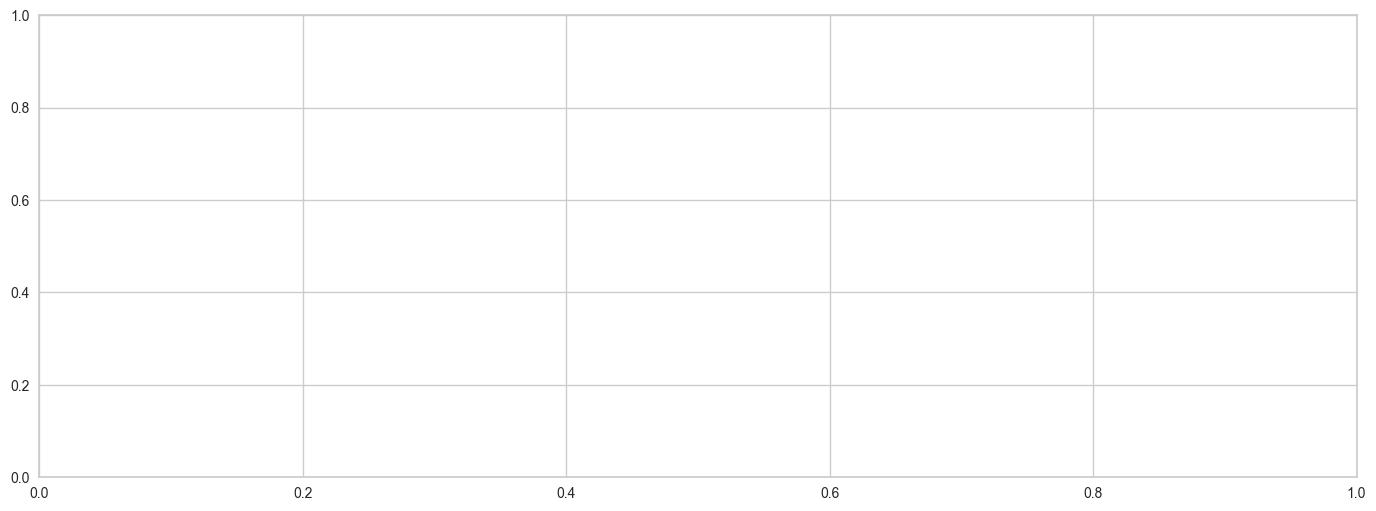

In [10]:
# evaluate trained model
evaluate_model(best)

In [11]:
# predict on hold-out/test set
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9598,0.9933,0.9548,0.9431,0.9489,0.9157,0.9158


In [41]:
# predict on new data
new_data = df.copy().drop('Success', axis = 1)
predictions = predict_model(best, data = new_data)
predictions

,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,prediction_label,prediction_score
0,0,4.1,159.0,19.000000,0,0.0,1,9,0,0.9957
1,0,3.9,967.0,14.000000,0,0.0,1,12,0,0.9904
2,0,4.7,87510.0,8.700000,0,0.0,1,9,1,0.9941
3,0,4.5,215644.0,25.000000,0,0.0,4,9,1,0.9970
4,0,4.3,967.0,2.800000,0,0.0,1,11,0,0.9905
...,...,...,...,...,...,...,...,...,...,...
10350,11,4.5,38.0,53.000000,0,0.0,1,39,0,0.9843
10351,11,5.0,4.0,3.600000,0,0.0,1,39,0,0.9966
10352,20,4.3,3.0,9.500000,0,0.0,1,71,0,0.9973
10353,3,4.5,114.0,21.516165,0,0.0,3,19,0,0.9963


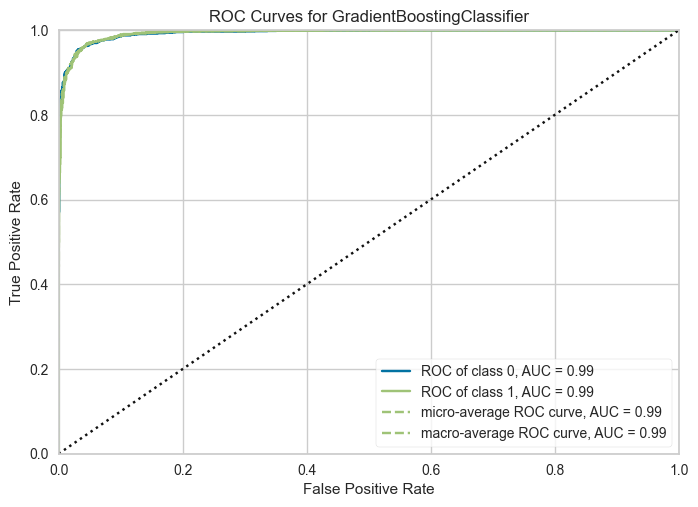

In [17]:
plot_model(best)

### The model shows a very good performance, which is 0.99.

# Use Scikit-learn to create pipeline for model prediction

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into features and target variable
df = df[['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Success']]
X = df.drop(['Success'], axis = 1)
y = df['Success']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),    # Step 1: Standardize the data
    ('model', LogisticRegression())  # Step 2: Fit a logistic regression model
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model performance
accuracy = pipeline.score(X_test, y_test)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.82


# Use Yellowbrick to visualize

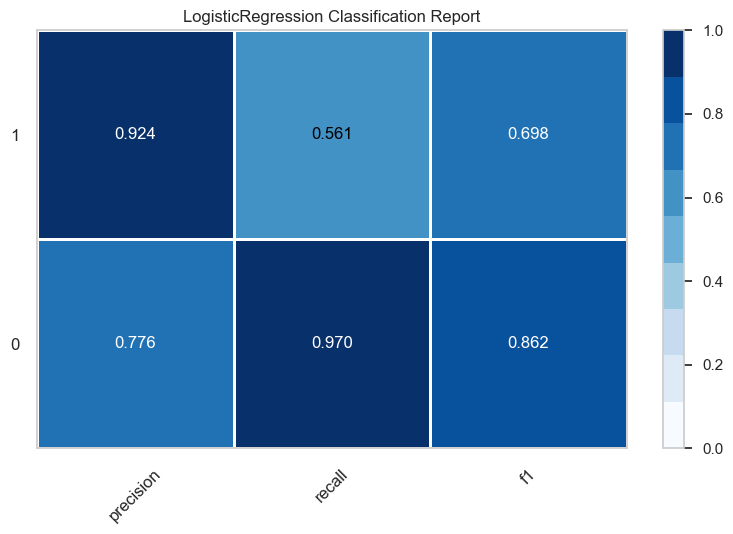

In [45]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport

# Create a ClassificationReport visualizer
visualizer = ClassificationReport(pipeline, classes=[0, 1], cmap='Blues')

# Fit the visualizer to the training data and evaluate on the test data
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Generate the classification report plot
visualizer.show();


# Make Predictions for Models by Yellowbrick

In [99]:
df = df[['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Success']]

In [100]:
X = df.drop(['Success'], axis = 1)
y = df['Success']

In [101]:
X

,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres
0,0,4.1,159.0,19.000000,0,0.0,1,9
1,0,3.9,967.0,14.000000,0,0.0,1,12
2,0,4.7,87510.0,8.700000,0,0.0,1,9
3,0,4.5,215644.0,25.000000,0,0.0,4,9
4,0,4.3,967.0,2.800000,0,0.0,1,11
...,...,...,...,...,...,...,...,...
10350,11,4.5,38.0,53.000000,0,0.0,1,39
10351,11,5.0,4.0,3.600000,0,0.0,1,39
10352,20,4.3,3.0,9.500000,0,0.0,1,71
10353,3,4.5,114.0,21.516165,0,0.0,3,19


AdaBoostClassifier:
  Accuracy: 77.89%
  Precision: 77.71%
  F1 Score: 77.76%

GradientBoostingClassifier:
  Accuracy: 77.15%
  Precision: 77.20%
  F1 Score: 76.40%

RandomForestClassifier:
  Accuracy: 100.00%
  Precision: 100.00%
  F1 Score: 100.00%

XGBClassifier:
  Accuracy: 83.24%
  Precision: 83.22%
  F1 Score: 83.23%



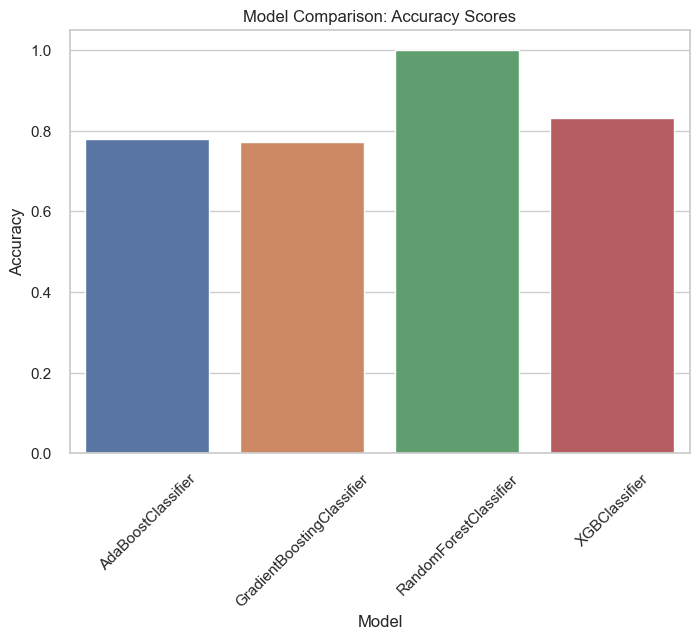

In [44]:
# make predictions, and evaluating the models using accuracy, precision, and F1-score metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.ensemble import AdaBoostClassifier
import numpy as np

accuracy_scores = []  # create an empty list to store accuracy scores

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle = True)

# define a list of machine learning models to be evaluated.
models = [
    AdaBoostClassifier(),
    
    GradientBoostingClassifier(),
    
    RandomForestClassifier(),
    
    XGBClassifier()
]

# Define the names of the models for x-axis labels
model_names = [model.__class__.__name__ for model in models]

# Fits the estimator to the data, make predictions, and calculates accuracy, precision, and F1-score
def score_model(X, y, estimator, **kwargs):
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)
    accuracy = accuracy_score(expected, predicted)
    precision = precision_score(expected, predicted, average='weighted', zero_division=True)
    f1 = f1_score(expected, predicted, average='weighted')
    
    # Print model evaluation metrics
    print(f"{estimator.__class__.__name__}:")
    print(f'  Accuracy: {accuracy*100:.2f}%')
    print(f'  Precision: {precision*100:.2f}%')
    print(f'  F1 Score: {f1*100:.2f}%\n')   
    return accuracy  # return accuracy score

# Loop through each model and store accuracy scores in the list
for model in models:
    accuracy = score_model(X, y, model)
    accuracy_scores.append(accuracy)

# Convert the accuracy scores list to a numpy array
accuracy_scores = np.array(accuracy_scores)

# Use the accuracy scores to create a bar chart for model comparison
import seaborn as sns
import matplotlib.pyplot as plt
# Set seaborn style
sns.set(style="whitegrid")

# Create bar plot with seaborn
sns.barplot(x=model_names, y=accuracy_scores)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy Scores')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()